## Importing required libraries

In [397]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score, precision_recall_curve, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.evaluate import bias_variance_decomp
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, fbeta_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

In [319]:
#pip install interpret

In [389]:
#load and read the data
df = pd.read_csv(r"C:\Users\pooji\Downloads\Dataset.csv")

In [390]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [275]:
df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

In [5]:
df.shape

(303, 14)

- **Inference:** We have a dataset with 303 rows which indicates a smaller set of data.

In [263]:
df.duplicated().sum()

0

- **Inference:** There are no duplicates in the dataset 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- We have 13 features with integer data types and only one feature with float data type among a total of 14 features. And there are no missing values in this dataset.

- There are total 14 features in the dataset.


1. Age: The person's age in years


2. Sex: The person's sex (M-> Male- 1, F-> Female-0)


3. ChestPainType: The chest pain experienced. There are 4 types.
    - TA: Typical Angina - 0
    - ATA: ATypical Angina - 1
    - NAP: Non- Anginal Pain - 2
    - ASY: Asymptomatic - 3


4. RestingBP: The person's resting blood pressure (in mm Hg)


5. Cholesterol: The person's cholesterol measurement in mg/dl


6. FastingBS: The person's fasting blood sugar (> 120 mg/dl => 1 = true; 0 = false)


7. RestingECG: Resting electrocardiographic measurement (0:Normal, 1:ST, 2:LVH )


8. thalach: The person's maximum heart rate achieved


9. exang(ExerciseAngina): Exercise induced angina (Y-1, N-0)


10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)


11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0–3)(nominal)

13. thal: A blood disorder called thalassemia 0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3:reversible defect (a blood flow is observed but it is not normal(nominal)


14. HeartDisease(target variable): Whether a person has a heart disease or not (0 = No heart disease, 1= has a heart disease)

In [391]:
# Seperating the categorical and continuous variables
categorical = []
continuos = []
for cols in df.columns:
    if len(df[cols].unique()) < 10:
        categorical.append(cols)
    else:
        continuos.append(cols)

In [231]:
categorical 

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

## Exploratory Data Analysis (EDA)

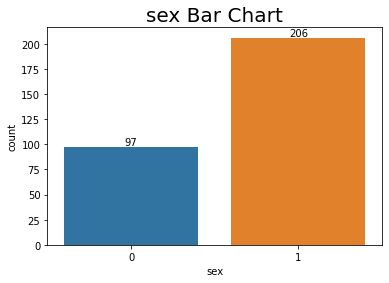

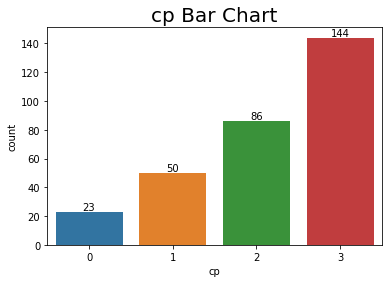

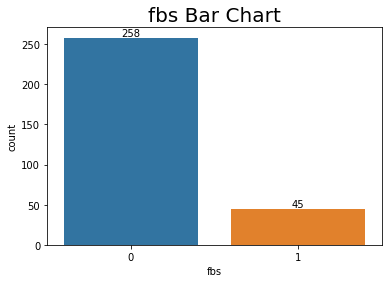

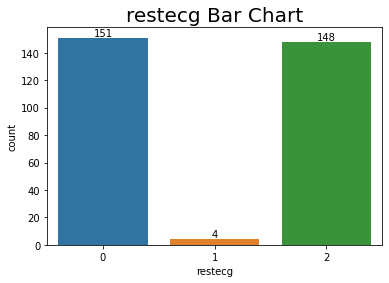

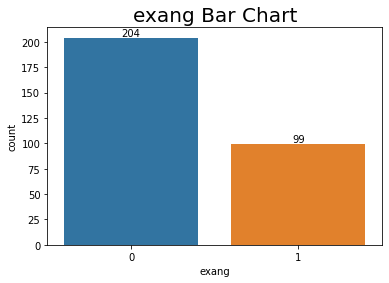

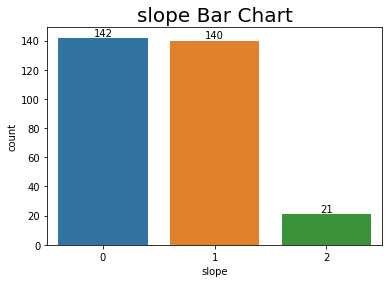

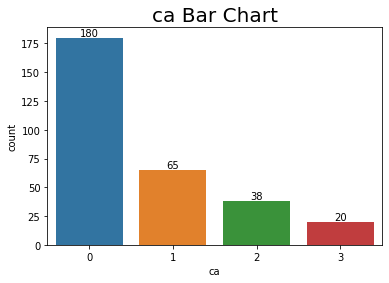

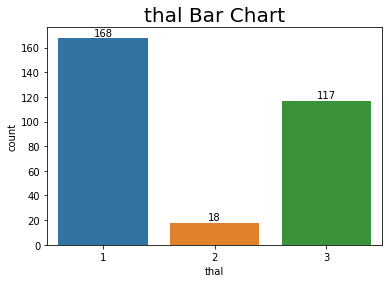

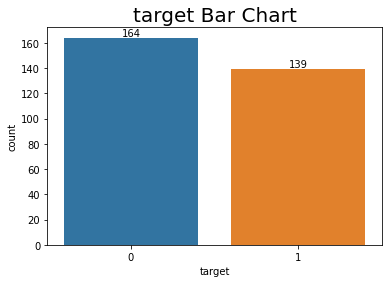

In [105]:
for col in categorical:
    ax = sns.countplot(x=col, data=df)
    for i in ax.containers:
        plt.title("{} Bar Chart".format(col),fontsize=20)
        ax.bar_label(i,)
    plt.show()

- Under our analysis, we found that 139 people are suffering from heart disease, and 164 are healthy.

- There are 206 Males and 97 Females in the dataset considered. 

- We observe that those who have chest pain of type ASY is more likely to affected by heart disease.

- People having blood sugar are more likely to have heart disease.

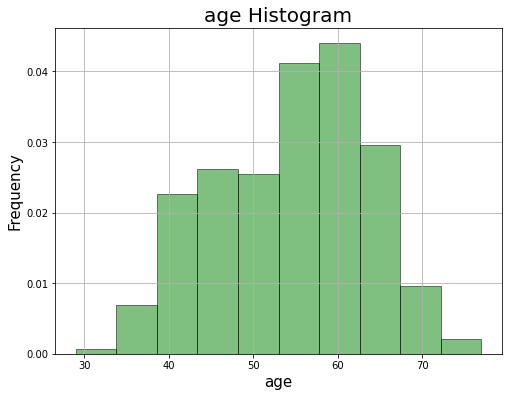

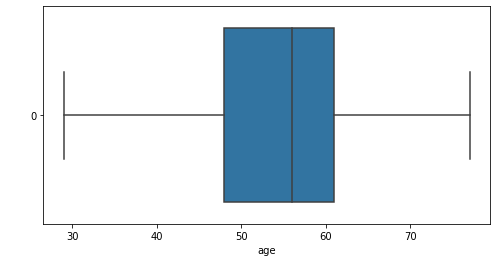

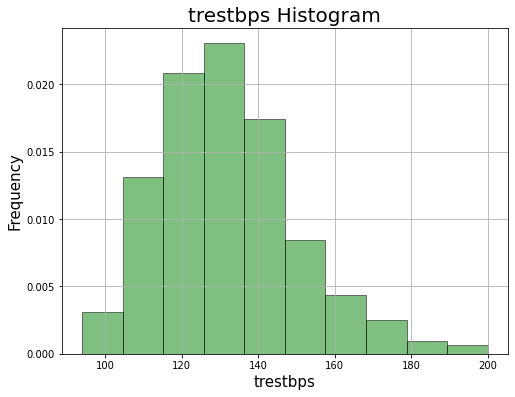

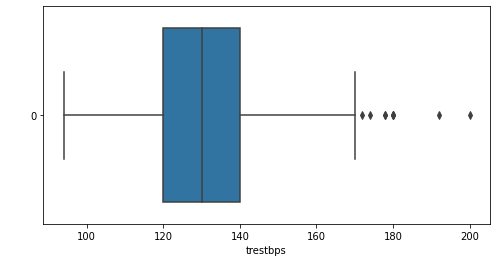

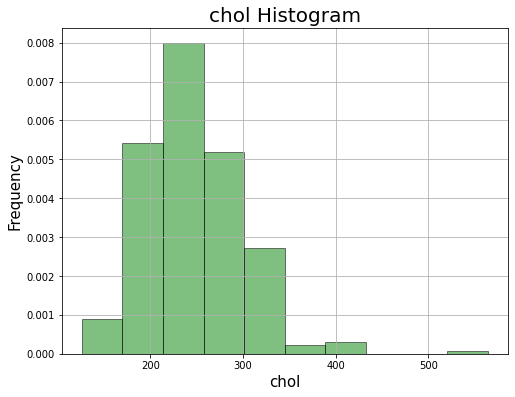

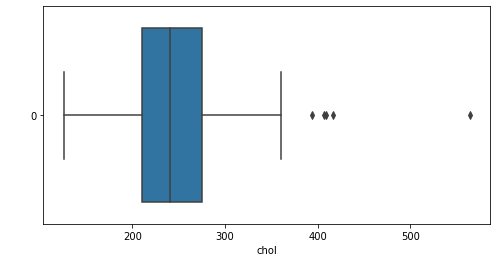

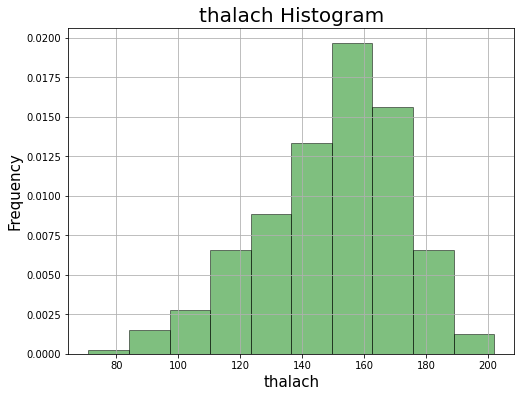

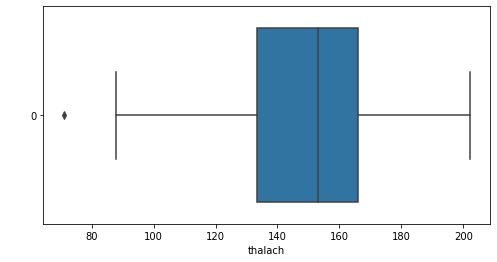

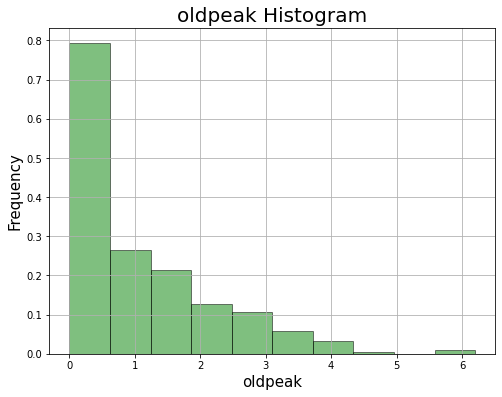

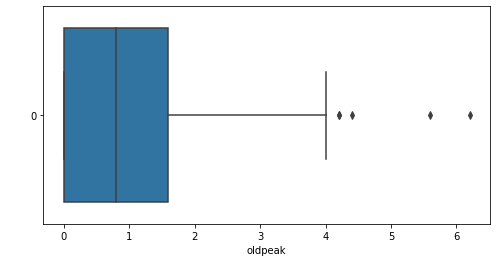

In [106]:
# plotting histogram and boxplot for each numerical variable
for i in continuos:
    plt.subplot(1,1,1) #(row, column, plot)
    df['%s'%i].plot(kind='hist',alpha=0.5, figsize=(8,6), color="Green",grid=True,edgecolor='black',density = True)
    plt.xlabel('%s'%i,fontsize=15)
    plt.ylabel("Frequency",fontsize=15)
    plt.title("{} Histogram".format(i),fontsize=20)
    plt.show()
    
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 1, 1)
    sns.boxplot(data=df[i],orient='h')
    plt.xlabel(i)
    plt.ylabel(' ',fontsize=20)
    plt.show()

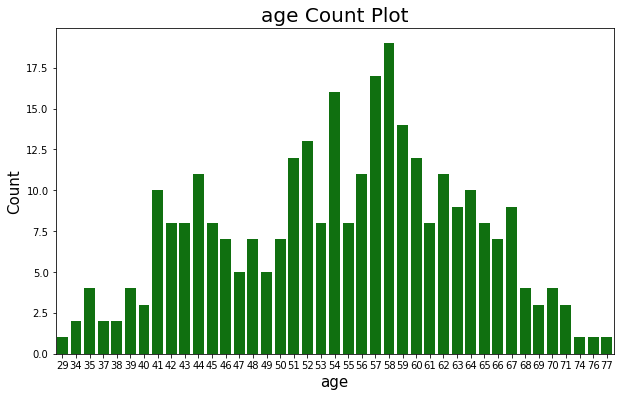

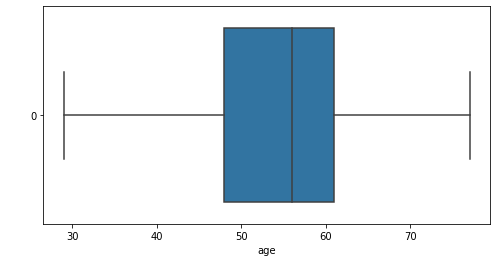

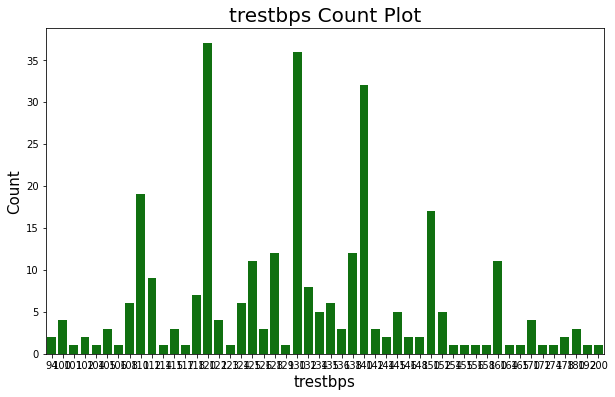

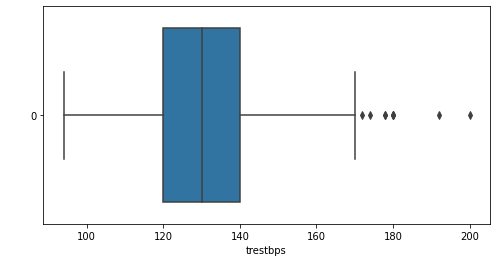

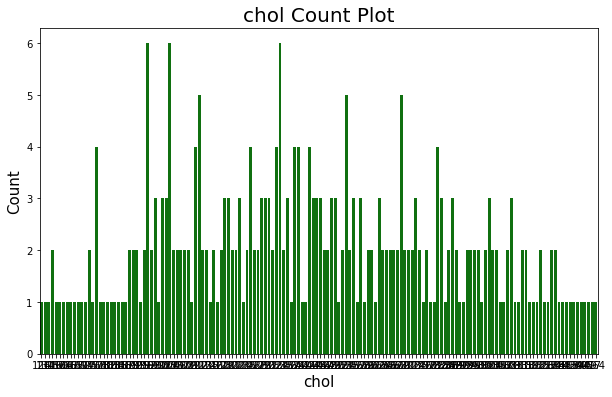

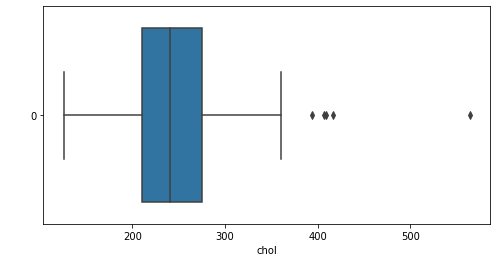

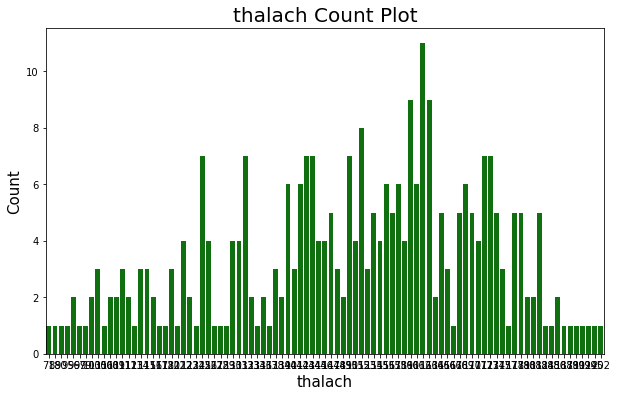

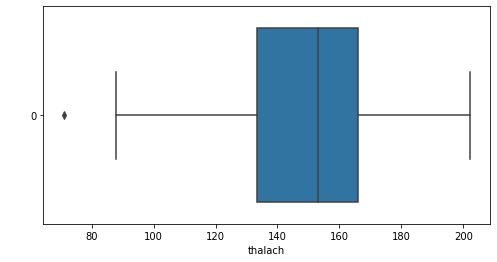

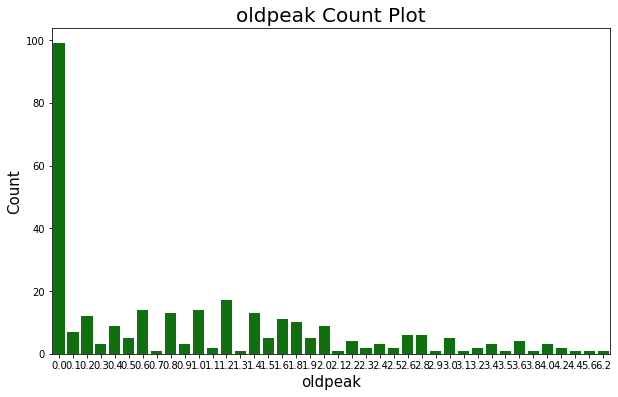

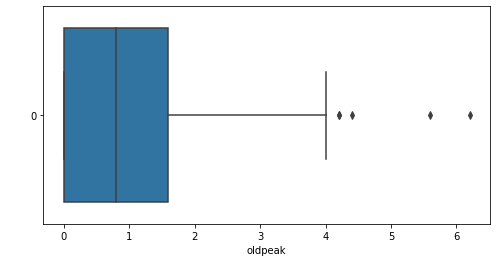

In [328]:
# plotting count plot and boxplot for each numerical variable
for i in continuos:
    plt.figure(figsize=(10,6))
    sns.countplot(x=i, data=df, color='green')
    plt.xlabel('%s'%i,fontsize=15)
    plt.ylabel("Count",fontsize=15)
    plt.title("{} Count Plot".format(i),fontsize=20)
    plt.show()
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 1, 1)
    sns.boxplot(data=df[i],orient='h')
    plt.xlabel(i)
    plt.ylabel(' ',fontsize=20)
    plt.show()

- People with age ranging from 47 to 62 are more likely to have heart disease.
- Resting blood pressure anything above 125-136 is generally of concern.
- People with a maximum of heart rate over 155 are more likely to have heart disease.
- Observed that there are outliers in RestingBP.

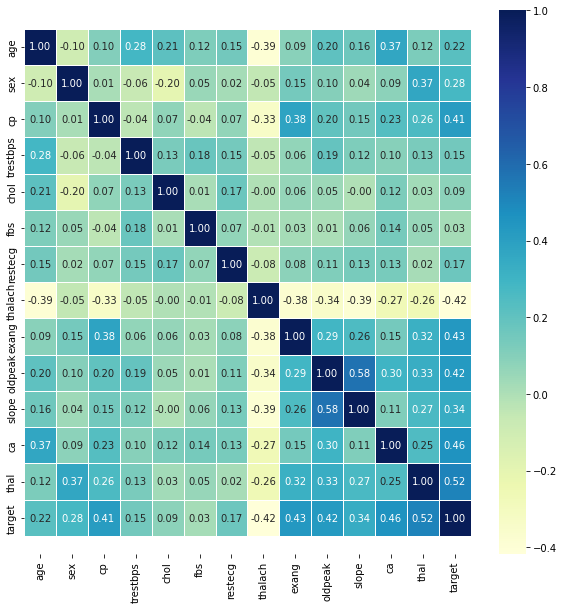

In [107]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

- By far we have checked the correlation between the features but it is also a good practice to check the correlation of the target variable.

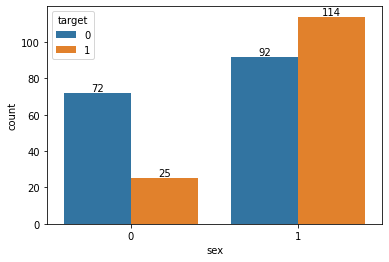

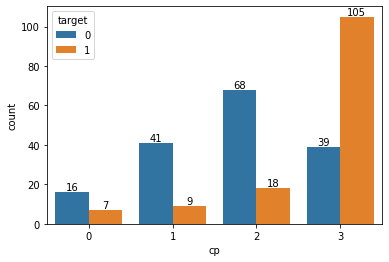

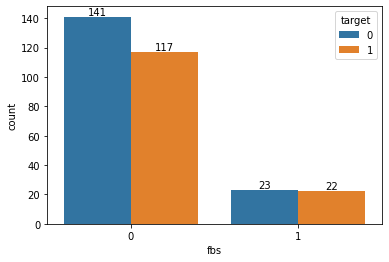

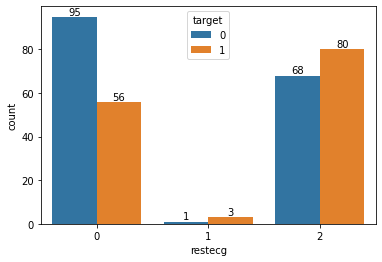

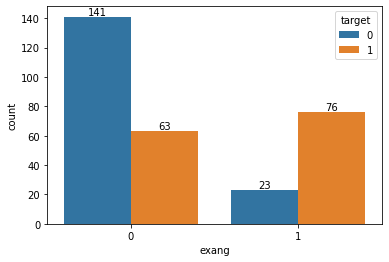

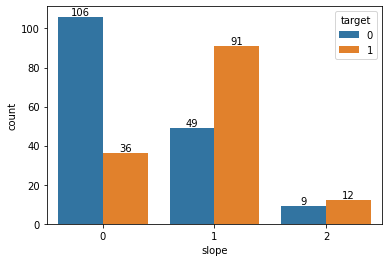

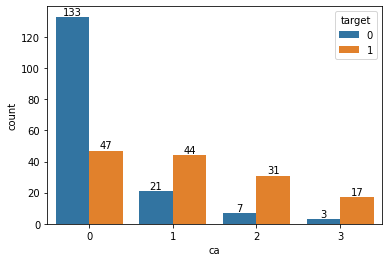

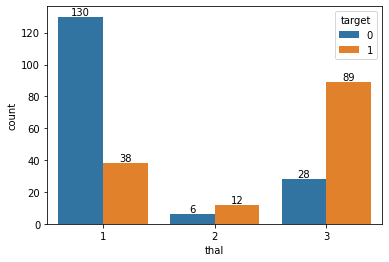

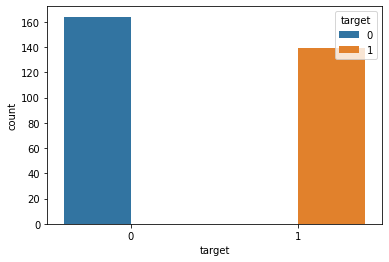

In [108]:
for col in categorical:
    ax = sns.countplot(x=col, hue= 'target', data = df)
    if col != 'target':
        for i in ax.containers:
            ax.bar_label(i,)
    plt.show()

- The proportion of infected male is greater than that of female
- We observe that those who have chest pain of type ASY is more likely to be affected by heart disease.
- People having blood sugar level are more likely to have heart disease.
- People having Exercise Angina are more likely to get heart disease.
- We also observe that people with ST Slope Flat are in more risk of getting a heart disease.

## Feature Importance

In [337]:
# Split the dataset into features and target
X = df.drop('target', axis=1)
y = df['target']

# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Create a dataframe with the feature importances and feature names
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the dataframe by importance values in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

     Feature  Importance
11        ca    0.127123
2         cp    0.122417
12      thal    0.122052
7    thalach    0.116649
9    oldpeak    0.102054
0        age    0.085744
4       chol    0.083955
3   trestbps    0.073768
8      exang    0.056116
10     slope    0.049516
1        sex    0.029807
6    restecg    0.019966
5        fbs    0.010834


## Data preprocessing

In [392]:
categorical.remove('target')

In [393]:
# Converting categorical variables to dummies
dfs = pd.get_dummies(df, columns=categorical)

In [394]:
dfs.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
1,67,160,286,108,1.5,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
2,67,120,229,129,2.6,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,41,130,204,172,1.4,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0


In [395]:
X = dfs.drop('target', axis = 1)
y = dfs.target

In [346]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
1,67,160,286,108,1.5,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
2,67,120,229,129,2.6,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,41,130,204,172,1.4,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,1.2,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
299,68,144,193,141,3.4,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
300,57,130,131,115,1.2,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
301,57,130,236,174,0.0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0


## Fitting the Baseline model

## Random Forest Classifier

F1 score using 10-fold Cross Validation: 0.8173740053050398
F2 score: 0.8263491773565819
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       164
           1       0.82      0.80      0.81       139

    accuracy                           0.83       303
   macro avg       0.83      0.83      0.83       303
weighted avg       0.83      0.83      0.83       303

AUROC: 0.9094139322688191


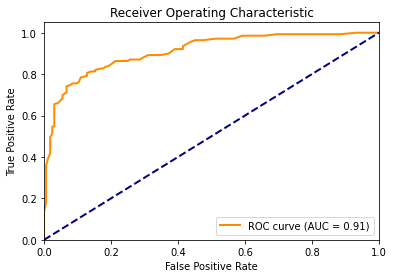

In [354]:
from sklearn.metrics import roc_curve, auc
rand_forest = RandomForestClassifier()


# Use cross-validation to generate scores and predictions
scores = cross_val_score(rand_forest, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(rand_forest, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(rand_forest, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



## Logistic Regression

F1 score using 10-fold Cross Validation: 0.8361714635218529
F2 score: 0.8520294074214712
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       164
           1       0.86      0.81      0.84       139

    accuracy                           0.85       303
   macro avg       0.86      0.85      0.85       303
weighted avg       0.86      0.85      0.85       303

AUROC: 0.9162133707668012


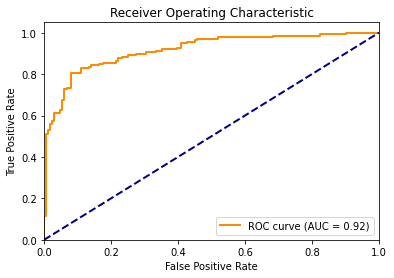

In [355]:
# create a logistic regression model 
lr = LogisticRegression()

# Use cross-validation to generate scores and predictions
scores = cross_val_score(lr, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(lr, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(lr, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Ada Boost Classifier

F1 score using 10-fold Cross Validation: 0.779112542629784
F2 score: 0.8043513838833202
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       164
           1       0.82      0.75      0.78       139

    accuracy                           0.81       303
   macro avg       0.81      0.80      0.81       303
weighted avg       0.81      0.81      0.81       303

AUROC: 0.881777504825408


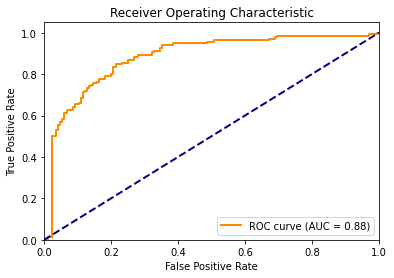

In [356]:
#Fitting adaboost tree classifier Model
ada_boost = AdaBoostClassifier()
ada_boost.fit(X, y)

# Use cross-validation to generate scores and predictions
scores = cross_val_score(ada_boost, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(ada_boost, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(ada_boost, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier

F1 score using 10-fold Cross Validation: 0.6949012935928349
F2 score: 0.7731337726385006
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       164
           1       0.76      0.74      0.75       139

    accuracy                           0.78       303
   macro avg       0.77      0.77      0.77       303
weighted avg       0.78      0.78      0.78       303

AUROC: 0.7253246183540972


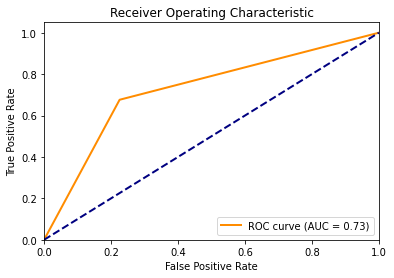

In [358]:
#Fitting Decision tree classifier Model 
dt = DecisionTreeClassifier()
dt.fit(X,y)

# Use cross-validation to generate scores and predictions
scores = cross_val_score(dt, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(dt, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(dt, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## XG Boost Classifier

F1 score using 10-fold Cross Validation: 0.7672636733348636
F2 score: 0.7864376238180208
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       164
           1       0.78      0.76      0.77       139

    accuracy                           0.79       303
   macro avg       0.79      0.79      0.79       303
weighted avg       0.79      0.79      0.79       303

AUROC: 0.8830057904895595


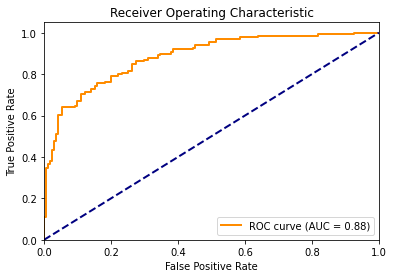

In [359]:
#Fitting XGBOOST classifier Model 
xg = XGBClassifier()

# Use cross-validation to generate scores and predictions
scores = cross_val_score(xg, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(xg, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(xg, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Bagging Classifier

F1 score using 10-fold Cross Validation: 0.7828219606480477
F2 score: 0.7648359131597611
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       164
           1       0.80      0.68      0.73       139

    accuracy                           0.77       303
   macro avg       0.78      0.76      0.77       303
weighted avg       0.78      0.77      0.77       303

AUROC: 0.8794744692051237


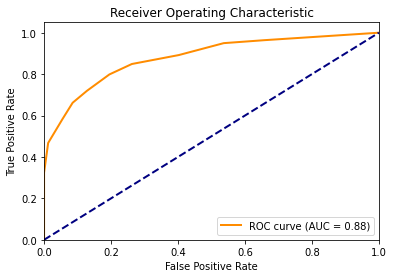

In [360]:
#Fitting bagging classifier Model on balanced data
bagging = BaggingClassifier()

# Use cross-validation to generate scores and predictions
scores = cross_val_score(bagging, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(bagging, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(bagging, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Explainable Boosting Machine(EBM)

F1 score using 10-fold Cross Validation: 0.8292923707117256
F2 score: 0.8453710735607451
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       164
           1       0.85      0.81      0.83       139

    accuracy                           0.85       303
   macro avg       0.85      0.84      0.85       303
weighted avg       0.85      0.85      0.85       303

AUROC: 0.9160817687313565


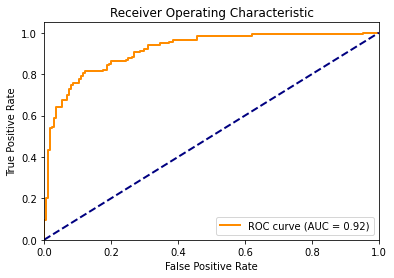

In [396]:
from interpret.glassbox import ExplainableBoostingClassifier
ebm = ExplainableBoostingClassifier()

# Use cross-validation to generate scores and predictions
scores = cross_val_score(ebm, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(ebm, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(ebm, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Standardising
- Standardization scales and centers the data, making it easier to compare and interpret the features by removing the differences in scale and magnitude.

In [361]:
sc = StandardScaler()
X[continuos] = sc.fit_transform(X[continuos])

In [362]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0


## Knn

F1 score using 10-fold Cross Validation: 0.7187970231474123
F2 score: 0.7439089884761326
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77       164
           1       0.72      0.72      0.72       139

    accuracy                           0.75       303
   macro avg       0.74      0.74      0.74       303
weighted avg       0.75      0.75      0.75       303

AUROC: 0.743858571679242


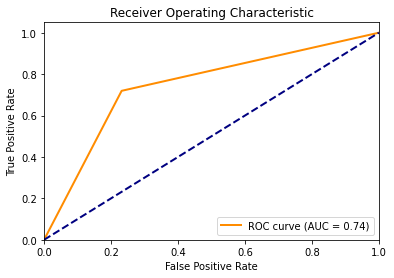

In [363]:
#Fitting XGBOOST classifier Model on balanced data
knn = KNeighborsClassifier(n_neighbors= 1, metric='euclidean')

# Use cross-validation to generate scores and predictions
scores = cross_val_score(knn, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(knn, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(knn, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- **Considered the F2 score as the evaluation metric for heart disease prediction due to its ability to emphasize the importance of correctly identifying positive cases while also considering the overall balance between precision and recall. By using the F2 score, we aimed to achieve a more comprehensive evaluation of our model's performance in predicting the presence of heart disease.**

- **The logistic regression model achieved the highest F2 score among all the models tested, indicating its superior performance in predicting heart disease in this study.**

## Feature selection using Information Value

- Information Value (IV) is used to evaluate the predictive power of a feature in a binary classification problem by measuring the strength of its association with the target variable.

In [364]:
#import monotonic binning to automatically calculate IV values for numeric values
from monotonic_binning.monotonic_woe_binning import Binning

In [365]:
#Side by Side boxplot
numeric = df.select_dtypes(exclude="object")
numeric = numeric.drop(["target"],axis=1)
# numeric

In [547]:
#bin_object.woe_summary

In [366]:
woe={}
iv={}          
for i in continuos:
    var = i     
    y_var = "target" 

    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    bin_object.fit(df[[y_var, var]])

    # Print WOE summary
    print(i,": ",np.sum(bin_object.woe_summary['IV_components']))
    iv[i]=(np.sum(bin_object.woe_summary['IV_components']))
    woe[f'woe_{i}'] = bin_object.woe_summary

age :  0.3653151687693767
trestbps :  0.1085461222344756
chol :  0.12219447106179457
thalach :  0.0
oldpeak :  0.6660418228583669


In [367]:
df= df.drop(['thalach'],axis=1)

- Dropped the feature thalach because i have considered threshold value of 0.01 for IV

In [383]:
# Seperating the categorical and continuous variables
categorical = []
continuos = []
for cols in df.columns:
    if len(df[cols].unique()) < 10:
        categorical.append(cols)
    else:
        continuos.append(cols)

In [384]:
categorical.remove('target')

In [385]:
# Converting categorical variables to dummies
df_iv = pd.get_dummies(df, columns=categorical)

In [386]:
df_iv.head()

,age,trestbps,chol,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,2.3,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
1,67,160,286,1.5,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
2,67,120,229,2.6,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,37,130,250,3.5,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,41,130,204,1.4,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0


In [387]:
X = df_iv.drop('target', axis = 1)
y = df_iv.target

In [373]:
X

,age,trestbps,chol,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,2.3,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
1,67,160,286,1.5,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
2,67,120,229,2.6,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,37,130,250,3.5,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,41,130,204,1.4,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,1.2,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
299,68,144,193,3.4,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
300,57,130,131,1.2,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
301,57,130,236,0.0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0


## Random Forest Classifier

F1 score using 10-fold Cross Validation: 0.8160813441903543
F2 score: 0.8377494011566533
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       164
           1       0.82      0.83      0.83       139

    accuracy                           0.84       303
   macro avg       0.84      0.84      0.84       303
weighted avg       0.84      0.84      0.84       303

AUROC: 0.9101816108089139


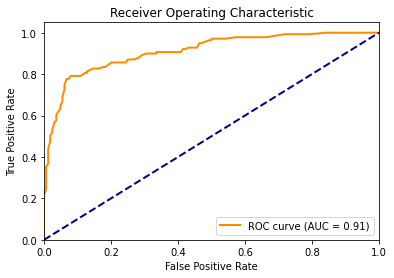

In [374]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X,y)

# Use cross-validation to generate scores and predictions
scores = cross_val_score(rand_forest, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(rand_forest, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(rand_forest, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression 

F1 score using 10-fold Cross Validation: 0.8390880565074113
F2 score: 0.852504946284927
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       164
           1       0.86      0.82      0.84       139

    accuracy                           0.85       303
   macro avg       0.86      0.85      0.85       303
weighted avg       0.85      0.85      0.85       303

AUROC: 0.9127039831549394


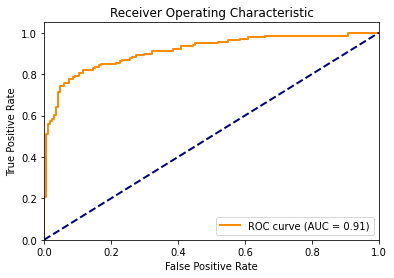

In [375]:
# create a logistic regression model on balanced data
lr = LogisticRegression()

# Use cross-validation to generate scores and predictions
scores = cross_val_score(lr, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(lr, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(lr, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Ada Boost Classifier

F1 score using 10-fold Cross Validation: 0.7693432536951423
F2 score: 0.7951727994316804
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       164
           1       0.80      0.75      0.77       139

    accuracy                           0.80       303
   macro avg       0.80      0.79      0.80       303
weighted avg       0.80      0.80      0.80       303

AUROC: 0.8802860150903667


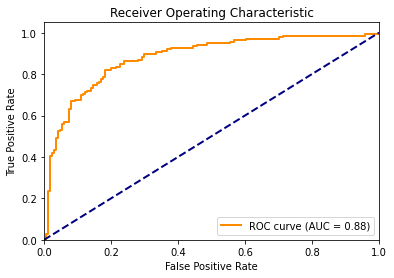

In [376]:
#Fitting adaboost tree classifier Model
ada_boost = AdaBoostClassifier()

# Use cross-validation to generate scores and predictions
scores = cross_val_score(ada_boost, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(ada_boost, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(ada_boost, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier

F1 score using 10-fold Cross Validation: 0.7326498919343748
F2 score: 0.7279538925117426
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       164
           1       0.70      0.71      0.71       139

    accuracy                           0.73       303
   macro avg       0.73      0.73      0.73       303
weighted avg       0.73      0.73      0.73       303

AUROC: 0.7424548166344973


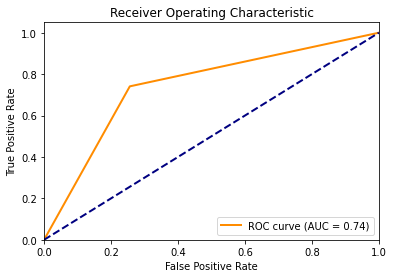

In [377]:
#Fitting Decision tree classifier Model on balanced data
dt = DecisionTreeClassifier()

# Use cross-validation to generate scores and predictions
scores = cross_val_score(dt, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(dt, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(dt, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## XG Boost Classifier

F1 score using 10-fold Cross Validation: 0.7674856637615258
F2 score: 0.7895256916996047
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       164
           1       0.78      0.76      0.77       139

    accuracy                           0.79       303
   macro avg       0.79      0.79      0.79       303
weighted avg       0.79      0.79      0.79       303

AUROC: 0.8873486576592384


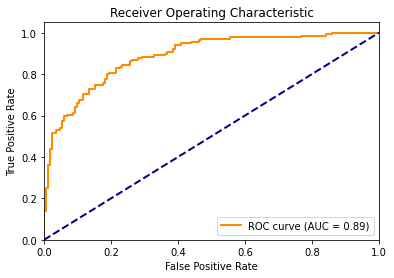

In [378]:
#Fitting XGBOOST classifier Model on balanced data
xg = XGBClassifier()

# Use cross-validation to generate scores and predictions
scores = cross_val_score(xg, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(xg, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(xg, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Bagging Classifier

F1 score using 10-fold Cross Validation: 0.7575192798899695
F2 score: 0.801832795844514
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       164
           1       0.81      0.76      0.78       139

    accuracy                           0.81       303
   macro avg       0.81      0.80      0.80       303
weighted avg       0.81      0.81      0.80       303

AUROC: 0.8552596946832777


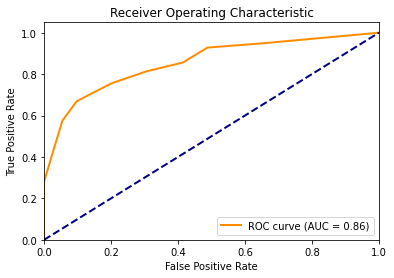

In [379]:
#Fitting bagging classifier Model on balanced data
bagging = BaggingClassifier()

# Use cross-validation to generate scores and predictions
scores = cross_val_score(bagging, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(bagging, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(bagging, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Explainable Boosting Machine(EBM)

F1 score using 10-fold Cross Validation: 0.7922308855812749
F2 score: 0.8125744578414871
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       164
           1       0.81      0.78      0.79       139

    accuracy                           0.82       303
   macro avg       0.81      0.81      0.81       303
weighted avg       0.82      0.82      0.81       303

AUROC: 0.8802860150903667


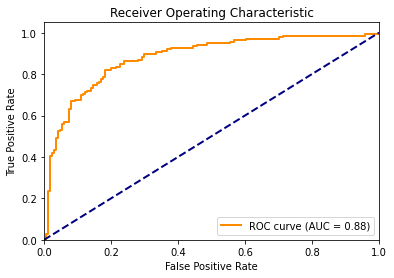

In [388]:
from interpret.glassbox import ExplainableBoostingClassifier
ebm = ExplainableBoostingClassifier()

# Use cross-validation to generate scores and predictions
scores = cross_val_score(ebm, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(ebm, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(ada_boost, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Standardising the data

In [380]:
sc = StandardScaler()
X[continuos] = sc.fit_transform(X[continuos])

In [381]:
X.head()

,age,trestbps,chol,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.948726,0.757525,-0.264900,1.087338,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
1,1.392002,1.611220,0.760415,0.397182,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
2,1.392002,-0.665300,-0.342283,1.346147,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,-1.932564,-0.096170,0.063974,2.122573,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,-1.489288,-0.096170,-0.825922,0.310912,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0


## Knn

F1 score using 10-fold Cross Validation: 0.730876468359227
F2 score: 0.7541015967713633
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       164
           1       0.73      0.73      0.73       139

    accuracy                           0.76       303
   macro avg       0.75      0.75      0.75       303
weighted avg       0.76      0.76      0.76       303

AUROC: 0.7541015967713635


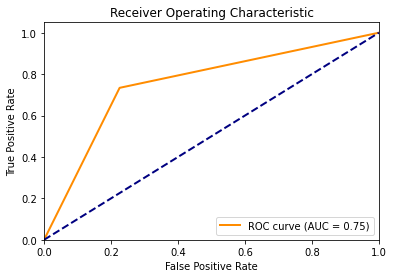

In [382]:
#Fitting XGBOOST classifier Model on balanced data
knn = KNeighborsClassifier(n_neighbors= 1, metric='euclidean')

# Use cross-validation to generate scores and predictions
scores = cross_val_score(knn, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(knn, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(knn, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tuning for Logistic regression, EBM and Random Forest

In [160]:
# define the logistic regression model
log_reg = LogisticRegression()

# define the hyperparameters to tune and their values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# create the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X, y)

# get the best hyperparameters and the corresponding accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", best_params)
print("Best accuracy: ", best_score)

Best hyperparameters:  {'C': 100, 'penalty': 'l2'}
Best accuracy:  0.848032786885246


F1 score using 10-fold Cross Validation: 0.8383898783209128
F2 score: 0.855112767147183
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       164
           1       0.87      0.81      0.84       139

    accuracy                           0.86       303
   macro avg       0.86      0.85      0.86       303
weighted avg       0.86      0.86      0.86       303

AUROC: 0.9160817687313564


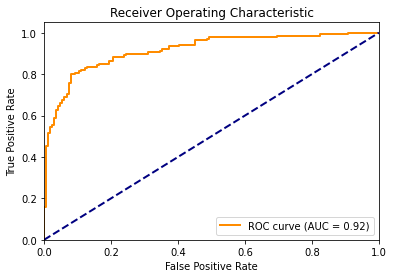

In [400]:
# create a logistic regression model on balanced data
lr = LogisticRegression(C=100, penalty='l2')

# Use cross-validation to generate scores and predictions
scores = cross_val_score(lr, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(lr, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(lr, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [329]:
# Define the EBM classifier
ebm = ExplainableBoostingClassifier()

# Define the parameter grid to search over
param_grid = {
    'max_bins': [50, 100, 200],
    'max_interaction_bins': [2, 3, 4],
    'interactions': [0, 1, 2],
    'outer_bags': [3, 5, 7],
    'inner_bags': [1, 2],
    'learning_rate': [0.01, 0.1, 0.2],
    'validation_size': [0.2, 0.3, 0.4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=ebm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'inner_bags': 2, 'interactions': 2, 'learning_rate': 0.2, 'max_bins': 100, 'max_interaction_bins': 4, 'outer_bags': 5, 'validation_size': 0.2}


F1 score using 10-fold Cross Validation: 0.8241611440921786
F2 score: 0.8417927743215157
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       164
           1       0.85      0.80      0.83       139

    accuracy                           0.84       303
   macro avg       0.85      0.84      0.84       303
weighted avg       0.85      0.84      0.84       303

AUROC: 0.9145025443060186


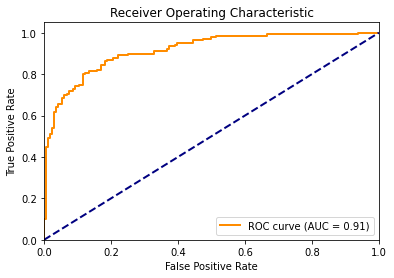

In [401]:
from interpret.glassbox import ExplainableBoostingClassifier
ebm = ExplainableBoostingClassifier(inner_bags = 2, interactions= 2, learning_rate= 0.2, max_bins= 100, max_interaction_bins= 4, outer_bags= 5, validation_size= 0.2)

# Use cross-validation to generate scores and predictions
scores = cross_val_score(ebm, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(ebm, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(ebm, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [319]:
#pip install interpret

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
# # define the hyperparameter space
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [2,4,6,8,10,12,14,16],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
 }

# # instantiate the Random Forest Classifier
rfc = RandomForestClassifier()

# # define the GridSearchCV object with cross-validation
grid_search = GridSearchCV(
    rfc, 
    param_grid=param_grid, 
    cv=5
 )

# # fit the GridSearchCV object to the data
grid_search.fit(X, y)

# # print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


F1 score using 10-fold Cross Validation: 0.8264965414019919
F2 score: 0.8310119030859332
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       164
           1       0.85      0.78      0.81       139

    accuracy                           0.83       303
   macro avg       0.84      0.83      0.83       303
weighted avg       0.84      0.83      0.83       303

AUROC: 0.9076592384628882


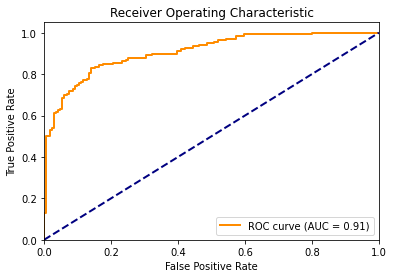

In [399]:
rand_forest = RandomForestClassifier(max_depth=10, min_samples_leaf = 2, min_samples_split = 10,n_estimators = 100)

# Use cross-validation to generate scores and predictions
scores = cross_val_score(rand_forest, X, y, cv=10, scoring='f1')
y_pred = cross_val_predict(rand_forest, X, y, cv=10)

# Perform k-fold cross-validation and predict probabilities
y_pred_prob = cross_val_predict(rand_forest, X, y, cv=10, method='predict_proba')

#compute classification report
report = classification_report(y, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y, y_pred, beta=2, average='macro')

# Compute ROC curve and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Compute AUROC
auroc = roc_auc_score(y, y_pred_prob[:, 1])

# Print the results
print("F1 score using 10-fold Cross Validation:", np.mean(scores))
print("F2 score:", f2)
print("Classification report:\n", report)
# Print AUROC
print("AUROC:",auroc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()